In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split


In [2]:
x = np.linspace(0, 3 * np.pi, 100000)

y_clean = np.sin(x)

In [3]:
noise = np.random.normal(0, 0.2, x.shape)

In [4]:
y = y_clean + noise

X = x.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= False)
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)
y_pred = model_lin.predict(x_test)
mse_lin = mean_squared_error(y_test, y_pred)

print("Linear MSE:",mse_lin)


Linear MSE: 1.3782241757600695


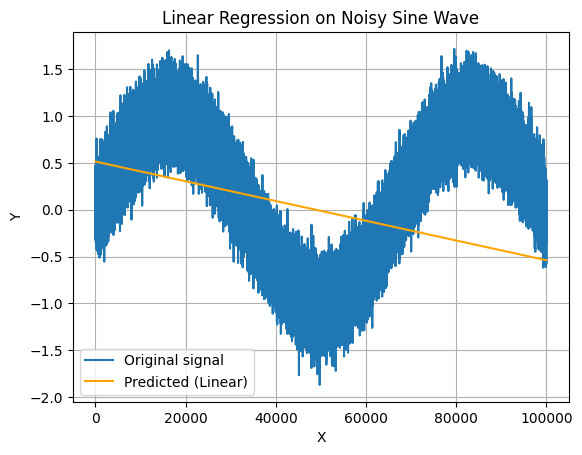

In [5]:
plt.plot(np.arange(len(y)), y, label="Original signal")
y_pred_lin = model_lin.predict(X)
plt.plot(np.arange(len(y_pred_lin)), y_pred_lin, label="Predicted (Linear)", color='orange')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression on Noisy Sine Wave")
plt.grid(True)
plt.show()

In [6]:
model_las = Lasso(alpha=0.001)
model_las.fit(x_train, y_train)
y_pred_las = model_las.predict(x_test)
mse_las = mean_squared_error(y_test, y_pred_las)

print("Lasso MSE:",mse_las)

Lasso MSE: 1.3760330658643356


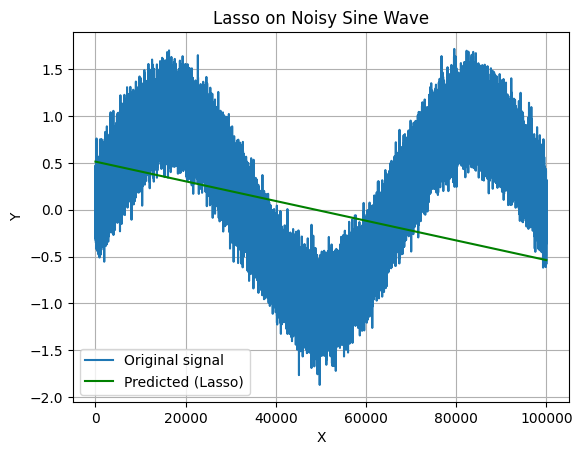

In [7]:
plt.plot(np.arange(len(y)), y, label="Original signal")
y_pred_las = model_las.predict(X)
plt.plot(np.arange(len(y_pred_las)), y_pred_las, label="Predicted (Lasso)", color='green')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lasso on Noisy Sine Wave")
plt.grid(True)
plt.show()

In [8]:
model_rid = Ridge(alpha=10)
model_rid .fit(x_train, y_train)
y_pred_Rid = model_rid.predict(x_test)
mse_Rid = mean_squared_error(y_test, y_pred_Rid)

print("Ridge MSE:",mse_Rid)

Ridge MSE: 1.3781935826161236


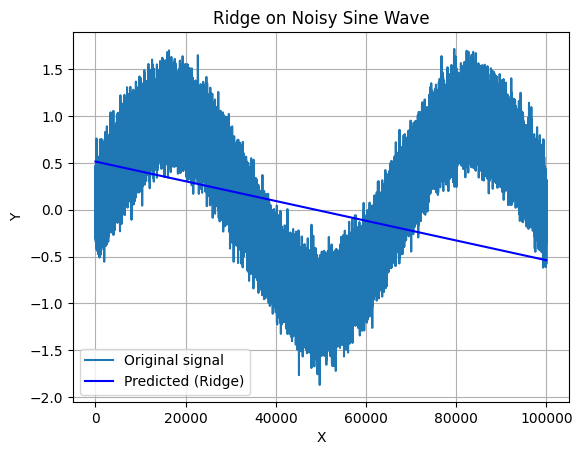

In [9]:
plt.plot(np.arange(len(y)), y, label="Original signal")
y_pred_rid = model_rid.predict(X)
plt.plot(np.arange(len(y_pred_rid)), y_pred_rid, label="Predicted (Ridge)", color='blue')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ridge on Noisy Sine Wave")
plt.grid(True)
plt.show()

ElasticNet MSE: 1.2606866129333976


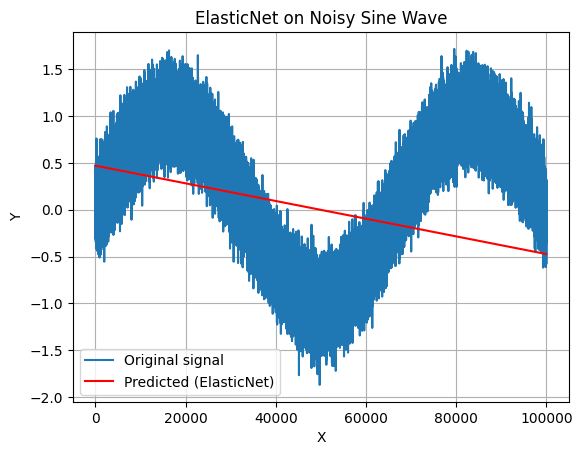

In [10]:
model_el = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_el.fit(x_train, y_train)

y_pred_el = model_el.predict(x_test)
mse_el = mean_squared_error(y_test, y_pred_el)
print("ElasticNet MSE:", mse_el)

plt.plot(np.arange(len(y)), y, label="Original signal")
y_pred_el = model_el.predict(X)
plt.plot(np.arange(len(y_pred_el)), y_pred_el, label="Predicted (ElasticNet)", color='red')

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("ElasticNet on Noisy Sine Wave")
plt.grid(True)
plt.show()

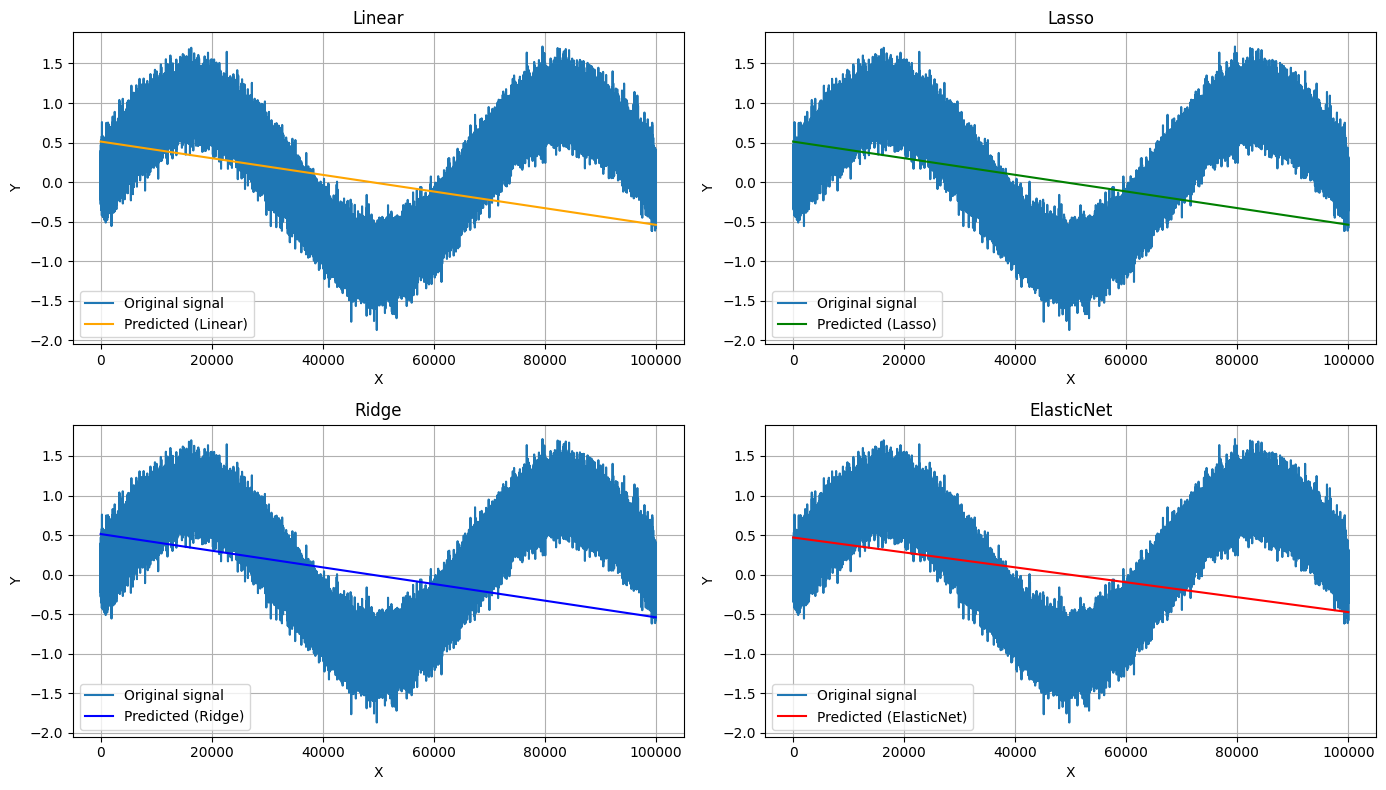

In [11]:
import matplotlib.pyplot as plt

models = [
    ("Linear", y_pred_lin, 'orange'),
    ("Lasso", y_pred_las, 'green'),
    ("Ridge", y_pred_rid, 'blue'),
    ("ElasticNet", y_pred_el, 'red'),
]

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

for ax, (title, y_pred, color) in zip(axs.ravel(), models):
    ax.plot(y, label="Original signal")
    ax.plot(y_pred, label=f"Predicted ({title})", color=color)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()